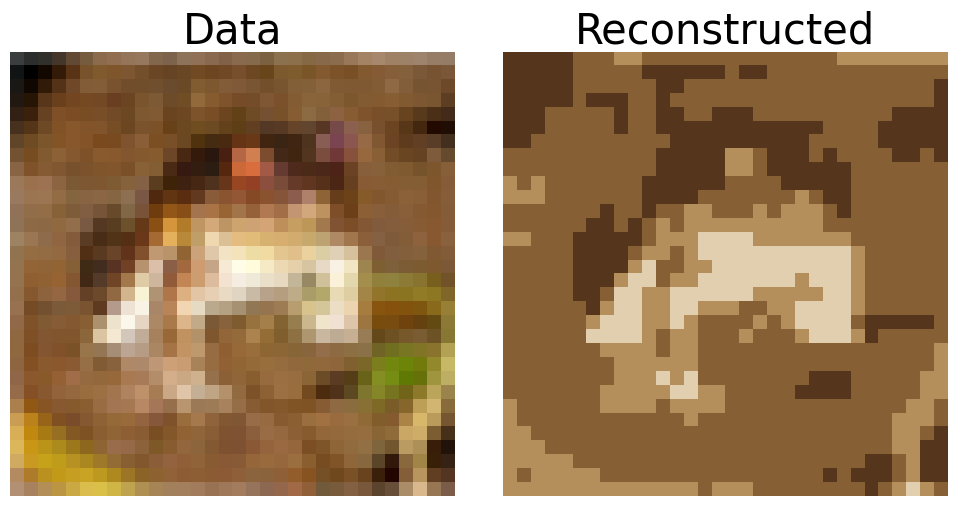

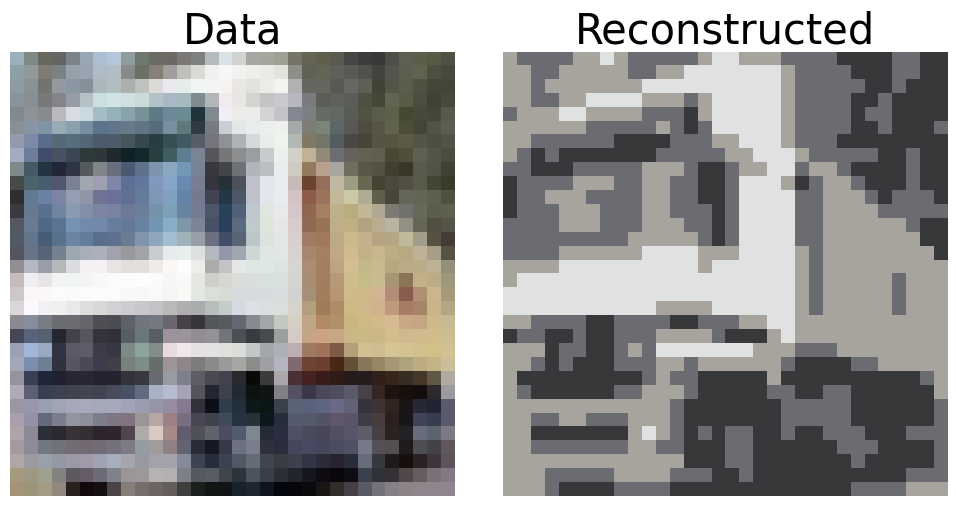

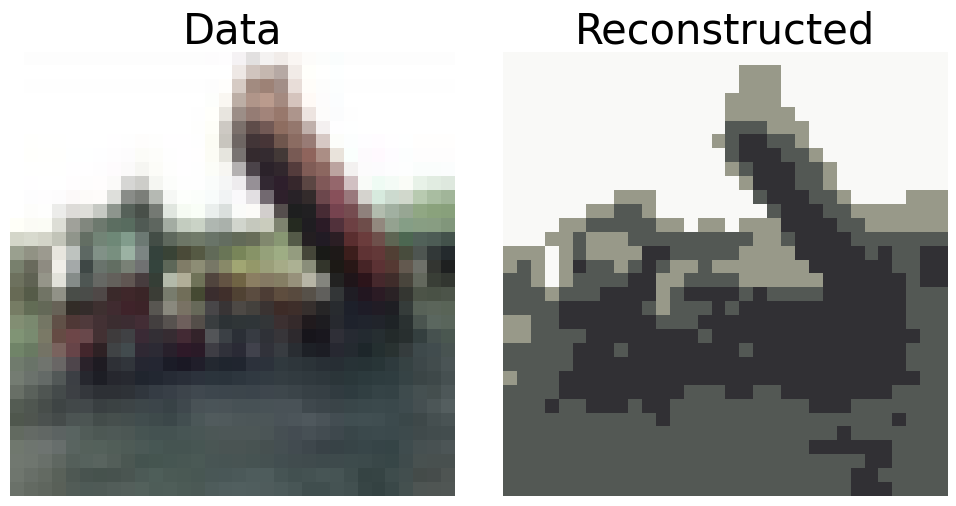

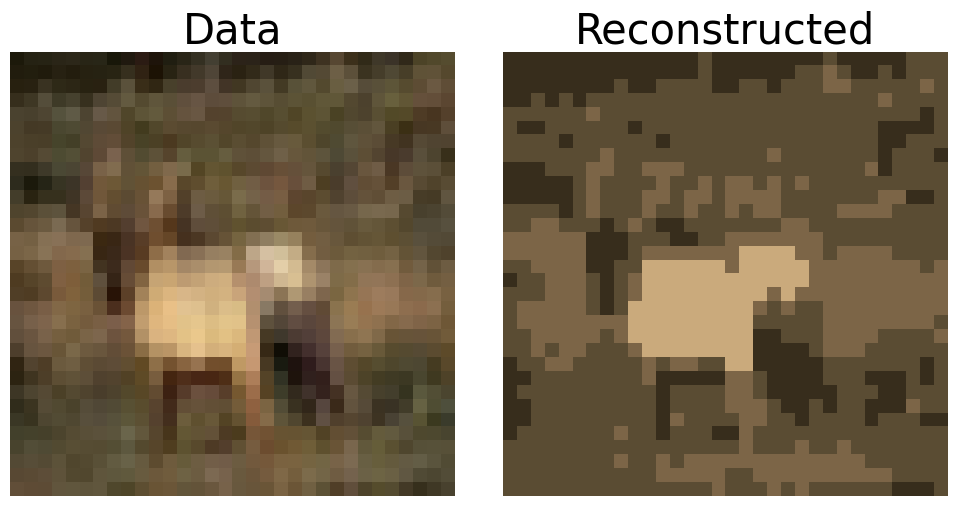

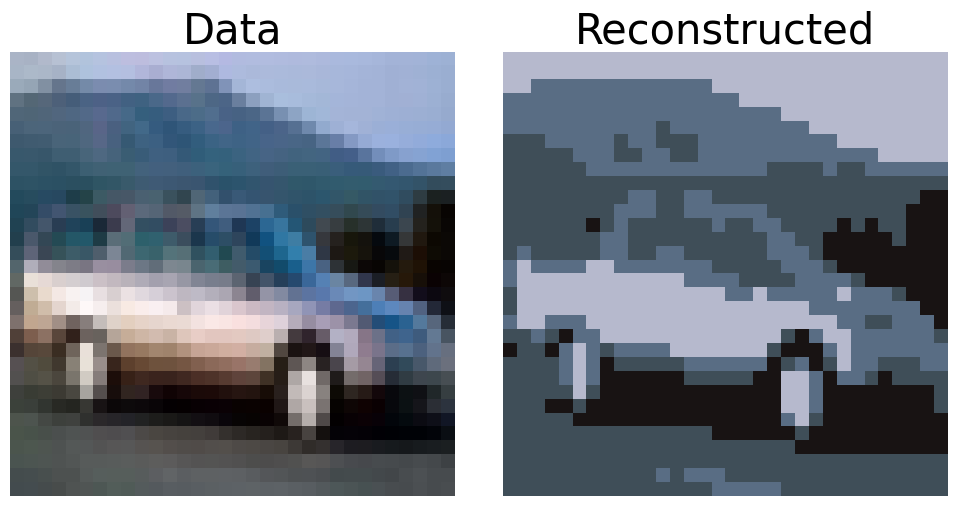

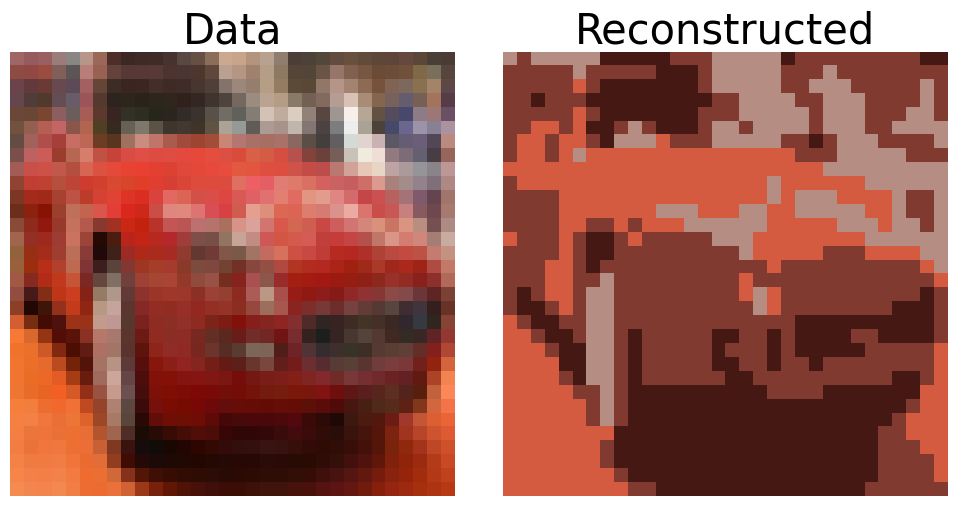

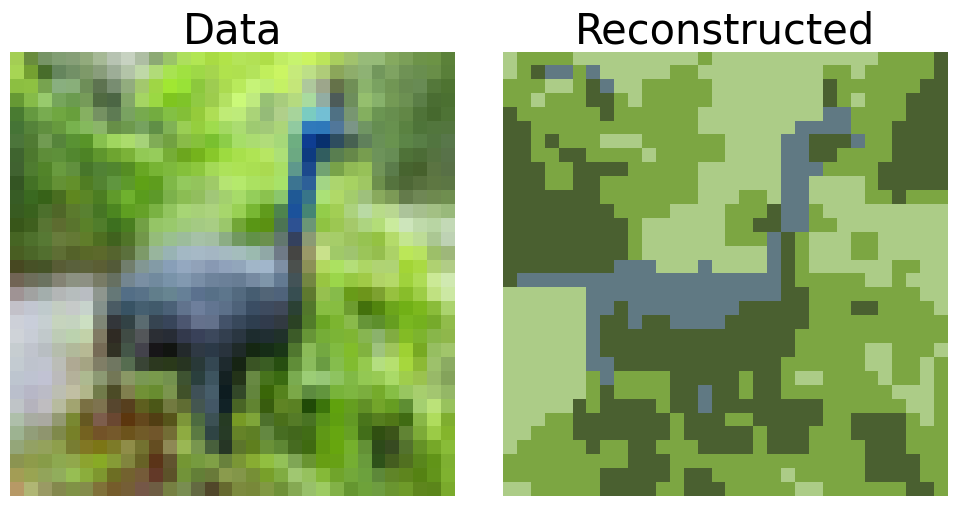

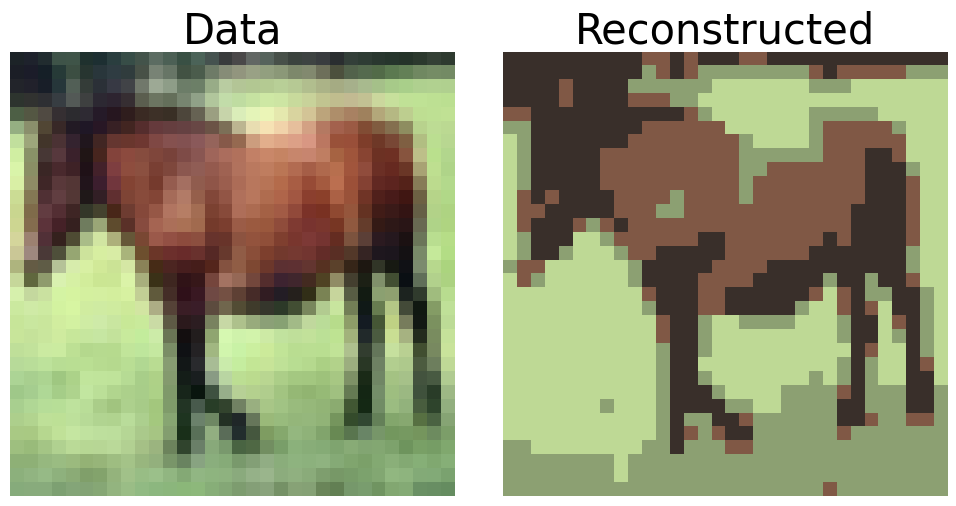

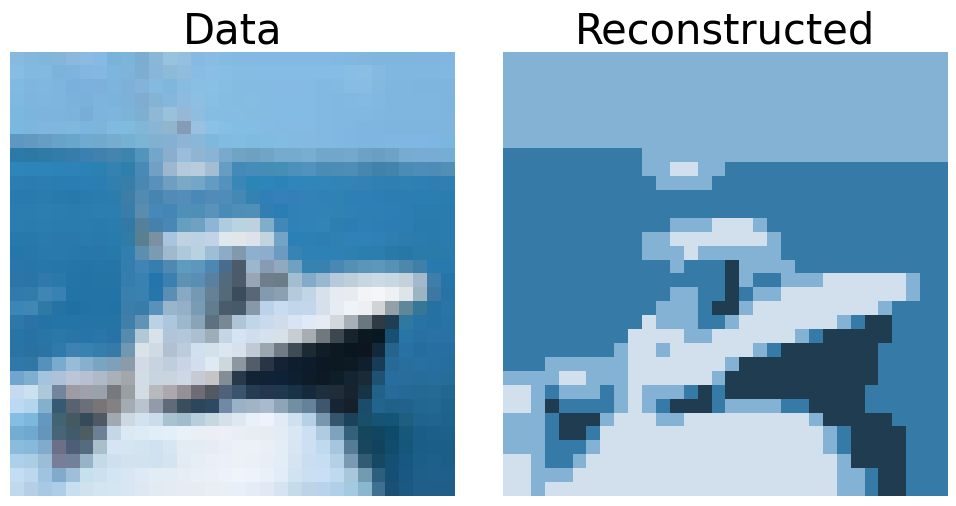

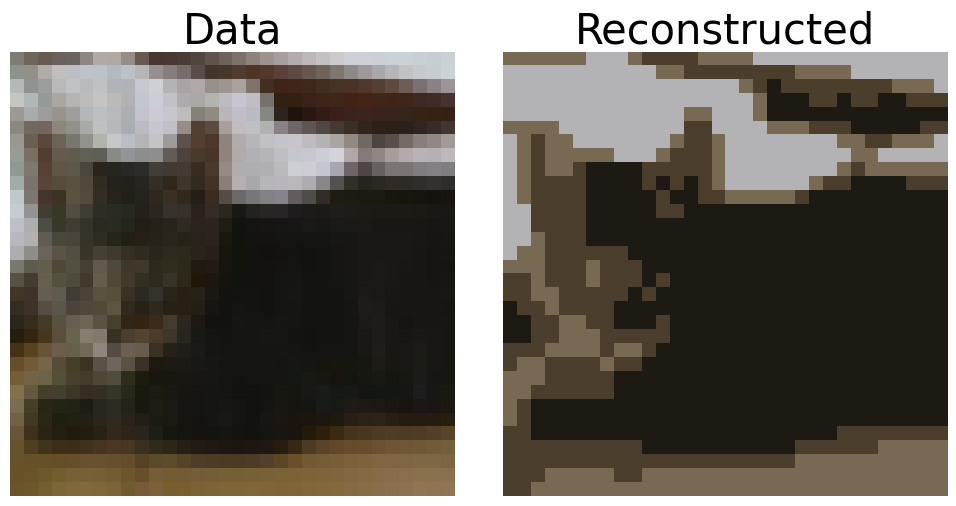

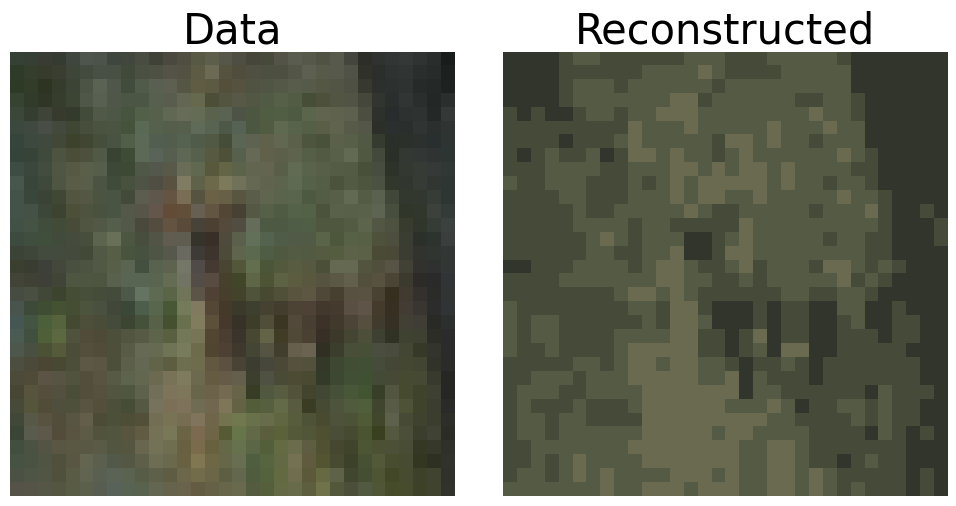

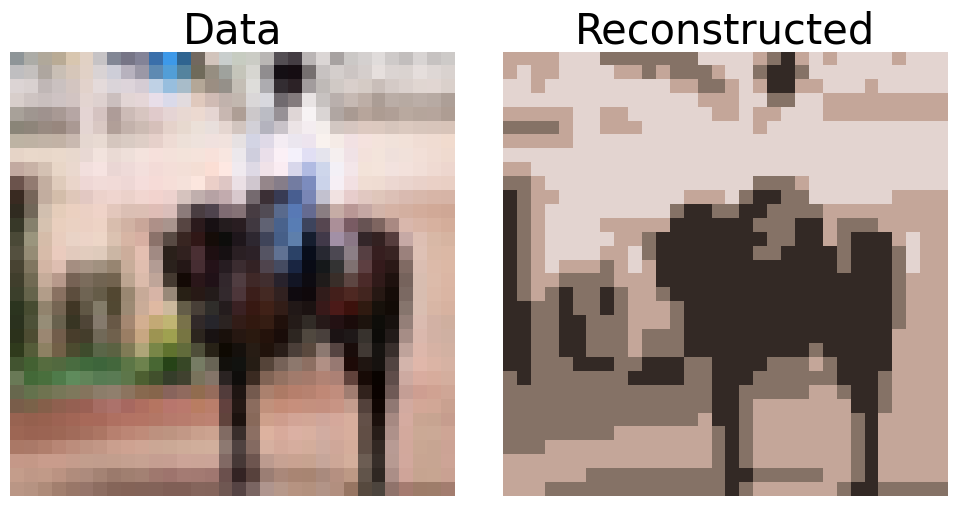

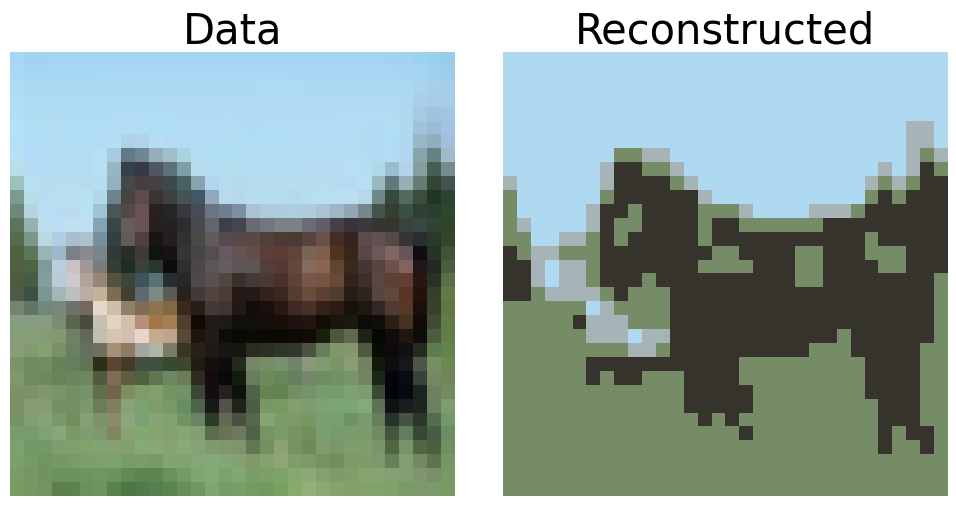

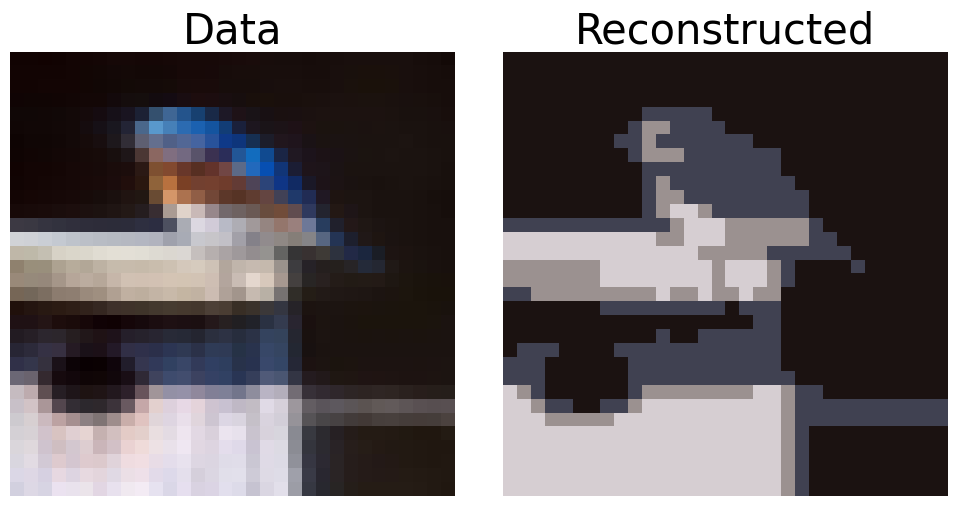

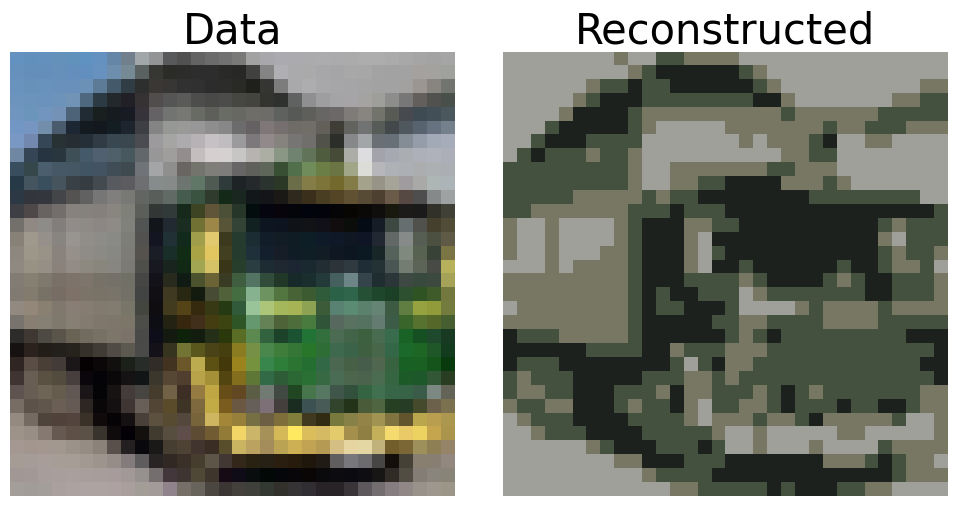

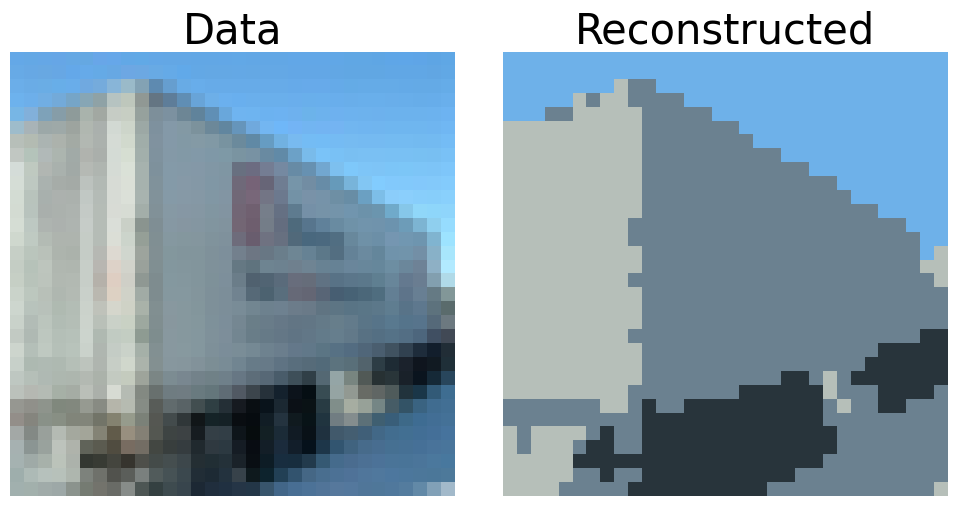

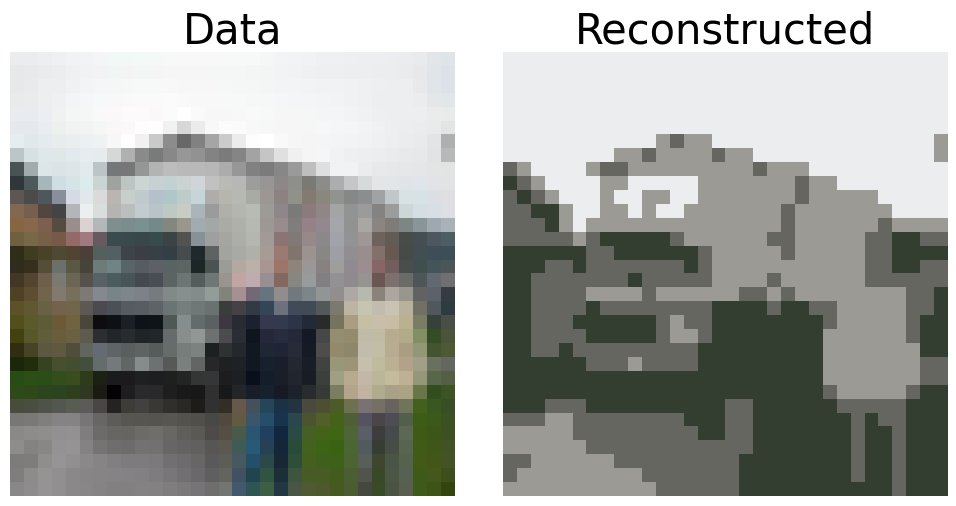

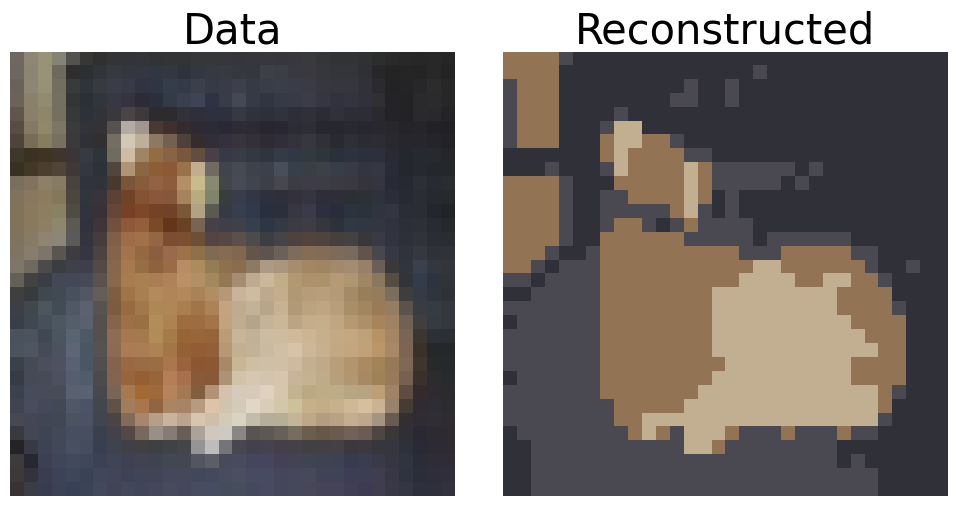

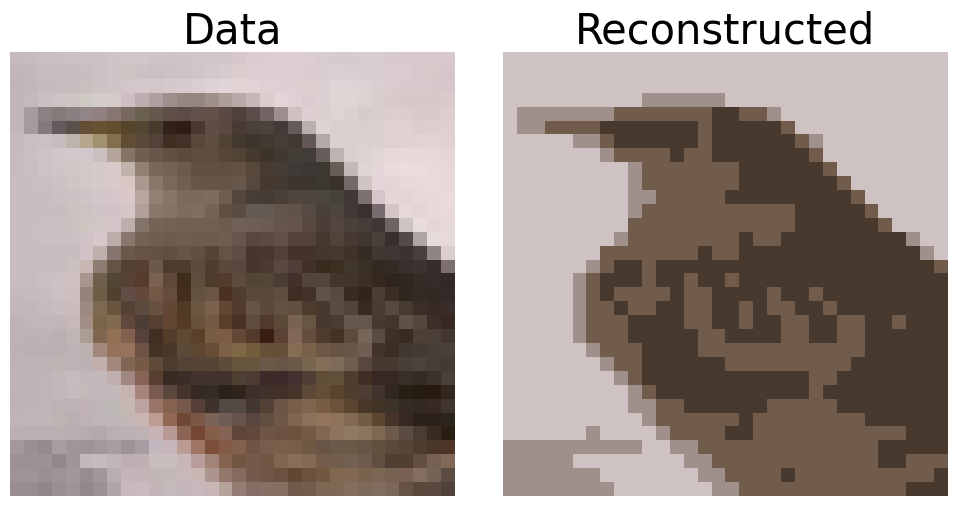

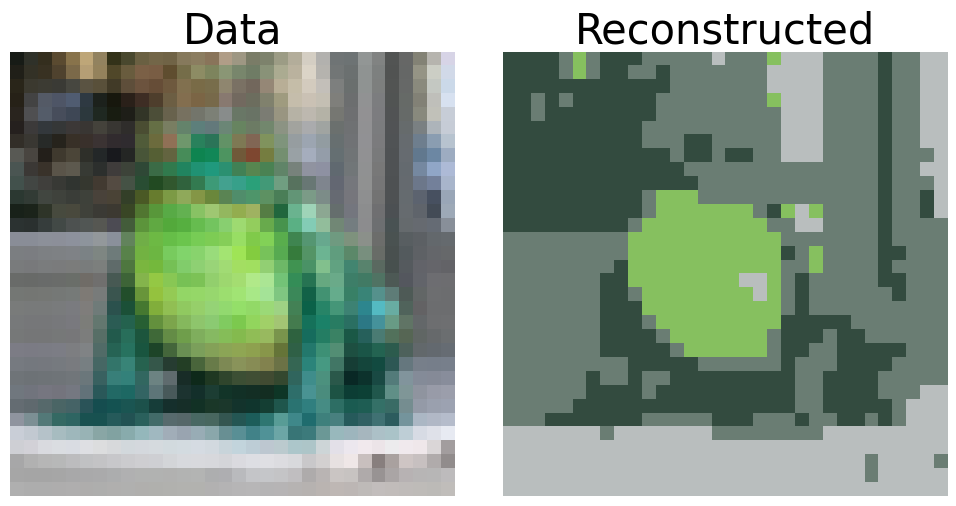

K=1: Original Size = 12288 bytes, Avg Compressed Size = 4108.0 bytes, Compression Rate = 0.3343098958333333
K=2: Original Size = 12288 bytes, Avg Compressed Size = 4120.0 bytes, Compression Rate = 0.3352864583333333
K=4: Original Size = 12288 bytes, Avg Compressed Size = 4144.0 bytes, Compression Rate = 0.3372395833333333
K=8: Original Size = 12288 bytes, Avg Compressed Size = 4192.0 bytes, Compression Rate = 0.3411458333333333
K=16: Original Size = 12288 bytes, Avg Compressed Size = 4288.0 bytes, Compression Rate = 0.3489583333333333
K=32: Original Size = 12288 bytes, Avg Compressed Size = 4480.0 bytes, Compression Rate = 0.3645833333333333
K=64: Original Size = 12288 bytes, Avg Compressed Size = 4864.0 bytes, Compression Rate = 0.3958333333333333
[(1, 0.044435917006572706), (2, 0.01249206624540966), (4, 0.004146093226241646), (8, 0.0016872347093740245), (16, 0.0007911991833680077), (32, 0.00039130496482357556), (64, 0.00019671894618386433)]
[(1, 0.3343098958333333), (2, 0.33528645833

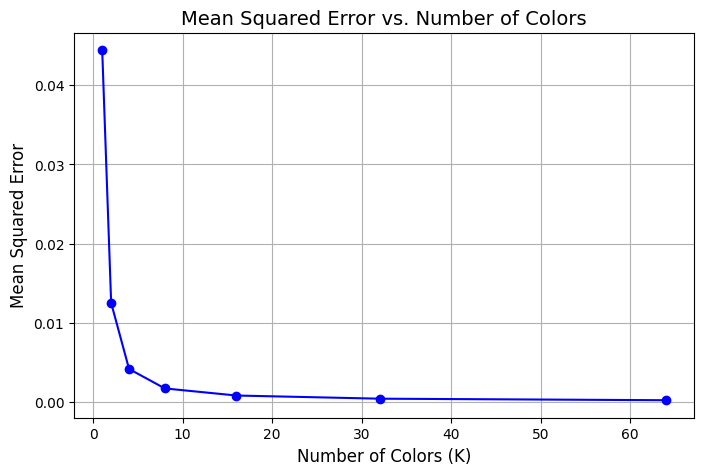

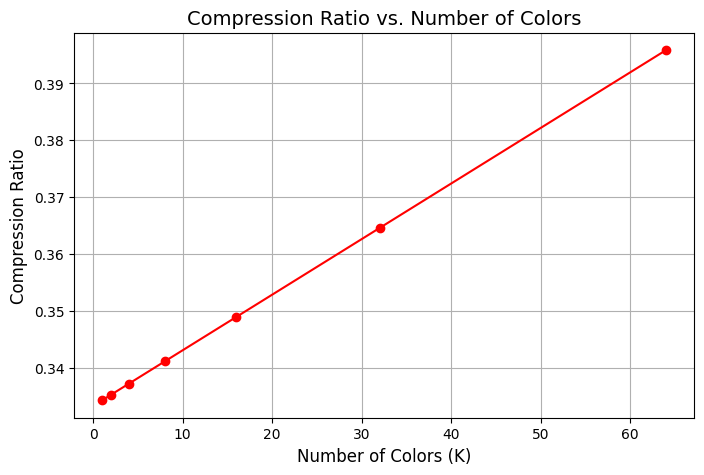

In [3]:
from tensorflow.keras.datasets import cifar10
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

def compress_image(img, n_colors=16):
    h, w, c = img.shape
    flat_img = img.reshape(-1, 3)

    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(flat_img)
    compressed_flat = kmeans.cluster_centers_[kmeans.labels_]

    # Calculate the size of the compressed image (in bytes)
    compressed_img = compressed_flat.reshape(h, w, c) # 4 bytes per index for K-means (typically 4 bytes for an integer)
    index_size = h * w * 4
    centroid_size = n_colors * 3 * 4
    total_compressed_size = index_size + centroid_size

    return compressed_img, total_compressed_size

def evaluate_mse(images, n_colors_list, num_samples=1000):
    mse_results = []
    ratio_results = []

    for k in n_colors_list:
        total_mse = 0
        total_compressed_size = 0
        for i in range(num_samples):
            original = images[i]
            original_size = original.size * original.itemsize
            compressed_img, compressed_size = compress_image(original, n_colors=k)
            mse = mean_squared_error(original.reshape(-1, 3), compressed_img.reshape(-1, 3))
            total_mse += mse
            total_compressed_size += compressed_size

        avg_mse = total_mse / num_samples  # Average MSE for this value of K
        avg_compressed_size = total_compressed_size / num_samples # Average compressed size for this value of K
        mse_results.append((k, avg_mse))
        print(f"K={k}: Original Size = {original_size} bytes, Avg Compressed Size = {avg_compressed_size} bytes, Compression Rate = {avg_compressed_size/original_size}")
        ratio_results.append((k, avg_compressed_size/original_size))

    return mse_results, ratio_results

def plot_compressed_images_separate(images, n_colors=4, num_images=20):
    for i in range(num_images):
        original = images[i]
        compressed_img, _ = compress_image(original, n_colors=n_colors)

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(original)
        axes[0].axis('off')
        axes[0].set_title("Data", fontsize=30)

        axes[1].imshow(compressed_img)
        axes[1].axis('off')
        axes[1].set_title("Reconstructed", fontsize=30)

        plt.tight_layout()
        plt.show()

plot_compressed_images_separate(x_train, n_colors=4, num_images=20)

n_colors_list = [1, 2, 4, 8, 16, 32, 64]

mse_results, ratio_results = evaluate_mse(x_train, n_colors_list)
print(mse_results)
print(ratio_results)

n_colors_mse, mse_values = zip(*mse_results)
n_colors_ratio, ratio_values = zip(*ratio_results)

# Plotting MSE
plt.figure(figsize=(8, 5))
plt.plot(n_colors_mse, mse_values, marker='o', linestyle='-', color='b')
plt.title('Mean Squared Error vs. Number of Colors', fontsize=14)
plt.xlabel('Number of Colors (K)', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.grid(True)
plt.show()

# Plotting Compression Ratio
plt.figure(figsize=(8, 5))
plt.plot(n_colors_ratio, ratio_values, marker='o', linestyle='-', color='r')
plt.title('Compression Ratio vs. Number of Colors', fontsize=14)
plt.xlabel('Number of Colors (K)', fontsize=12)
plt.ylabel('Compression Ratio', fontsize=12)
plt.grid(True)
plt.show()
